### Plot number of scenting bees over time

In [296]:
# Imports
import json
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
# mpl.use('Agg')
%matplotlib inline
from matplotlib import cycler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import os
import glob2
import re
import random

In [88]:
plt.style.use('seaborn-white')

plt.rcParams['font.sans-serif'] = "Tahoma"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['lines.linewidth'] = 2
params = {"ytick.color" : "#535956",
          "xtick.color" : "#535956",
          "axes.labelcolor" : "#535956",
          "axes.edgecolor" : "#535956",
          "text.color": "#535956"}
plt.rcParams.update(params)

### Load in JSON from combine_replicates.py and pull out position_history data

In [109]:
def get_position_data(param_set_json):

    ''' Load in each JSON created by combine_replicates.py and get position_history data '''

    with open("combined_replicates/" + param_set_json, "r") as f:
        data = json.load(f)

    # sample_length = len(data[0]["Replicate {}".format(1)]["position_history"])

    all_replicates = []
    for j in range(len(data)):  # Loop over each replicate
        
        # print(j)
        
        all_distances = {}
        # Loop over 50 workers
        for i in range(1, 51):
            position = data[j]["Replicate {}".format(j+1)]["position_history"]["worker_{}".format(i)]
            all_distances["worker_{}".format(i)] = position
       
        all_replicates.append(all_distances)

    # Write truncated data to JSON
    start_char = "j"
    filename = f.name
    name = filename[20:filename.index(start_char)]

    with open('position_data/{}json'.format(name), 'w') as outfile:
        json.dump(all_replicates, outfile)

    return None

In [110]:
# Test function
get_position_data("Q0.15_W0.4_D0.2_T0.005_wb1.json")

### Plot average number of scenting bees (across all replicates) over time

In [111]:
with open("position_data/Q0.15_W0.4_D0.2_T0.005_wb1.json", "r") as f:
    position_data = json.load(f)

In [112]:
len(position_data)

20

In [122]:
# position_data[19]

In [116]:
# Each timestep data of 1 bee
len(position_data[0])

50

In [119]:
position_data[0]["worker_1"]

[{'found_queen_direction': False,
  'scenting': False,
  'x': -0.6795879221967756,
  'y': 1.569063790304833},
 {'found_queen_direction': False,
  'scenting': False,
  'x': -0.6795879221967756,
  'y': 1.609063790304833},
 {'found_queen_direction': False,
  'scenting': False,
  'x': -0.6995879221967756,
  'y': 1.609063790304833},
 {'found_queen_direction': False,
  'scenting': False,
  'x': -0.6995879221967756,
  'y': 1.599063790304833},
 {'found_queen_direction': False,
  'scenting': False,
  'x': -0.6995879221967756,
  'y': 1.559063790304833},
 {'found_queen_direction': False,
  'scenting': False,
  'x': -0.6995879221967756,
  'y': 1.539063790304833},
 {'found_queen_direction': False,
  'scenting': False,
  'x': -0.6995879221967756,
  'y': 1.499063790304833},
 {'found_queen_direction': True,
  'scenting': True,
  'x': -0.6995879221967756,
  'y': 1.499063790304833},
 {'found_queen_direction': True,
  'scenting': True,
  'x': -0.6995879221967756,
  'y': 1.499063790304833},
 {'found_queen

Processing 20-replicate json:

In [136]:
def scenting_all_replicates(json_file):
    
    ''' Get data from the combine_replicates: Get dict of 20 keys, each has data for 50 bees over 160 timesteps '''
    
    with open("position_data/" + json_file, "r") as f:
        position_data = json.load(f)
    

    all_replicates = {}
    for replicate_i in range(len(position_data)):
    # for replicate_i in range(1):
        
        ### Get scenting for all bees over 160 timesteps
        scenting_all_bees = []
        
        for bee in range(1,51):
            # Get list of one bee's scenting over 160 timesteps
            scenting_1_bee = []
            for i in range(0, 160):
                scenting = position_data[replicate_i]["worker_{}".format(bee)][i]["scenting"]
                scenting_1_bee.append(scenting)

            scenting_all_bees.append(scenting_1_bee)
            
        all_replicates["Replicate {}".format(replicate_i+1)] = scenting_all_bees
        

    return all_replicates

In [137]:
len(scenting_all_replicates("Q0.15_W0.4_D0.2_T0.005_wb1.json")["Replicate 1"])

50

In [177]:
all_reps_data = scenting_all_replicates("Q0.15_W0.4_D0.2_T0.005_wb1.json")

In [146]:
len(all_reps_data["Replicate 1"][0])

160

#### For each replicate, count number of scenting bees over time

In [180]:
def count_scenting_bees(json_file, replicate_i):
    
    all_reps_data = scenting_all_replicates(json_file)
    
    # 1 worker over time: scenting_all_replicates("Q0.15_W0.4_D0.2_T0.005_wb1.json")["Replicate 1"][0]

    all_bees = []
    for bee_i in range(len(all_reps_data["Replicate {}".format(replicate_i)])):  # 50
        # Loop over time steps
        one_bee = []
        for t_i in range(len(all_reps_data["Replicate {}".format(replicate_i)][0])):   # 160
            one_worker_one_t = all_reps_data["Replicate {}".format(replicate_i)][bee_i][t_i]
            one_bee.append(one_worker_one_t)
        all_bees.append(one_bee)
        
        
    # Combine all separate lists for bees into this list; each list inside is a timestep over all bees
    ### Get scenting for all bees over all time
    over_all_time = []

    # Loop over all timesteps
    for time_i in range(len(all_bees[0])):
        # Loop over each of 50 lists in scenting_all_bees  
        one_t = []
        for bee_i in range(len(all_bees)):
            scenting = all_bees[bee_i][time_i]
            one_t.append(scenting)
        over_all_time.append(one_t)
        
    ### Count scenting bees in swarm over time
    swarm_over_time = []
    for t in over_all_time:
        scenting_true = sum(t)
        swarm_over_time.append(scenting_true)
        
    return swarm_over_time

In [238]:
x = count_scenting_bees("Q0.15_W0.4_D0.2_T0.005_wb1.json", 1)
x

[0,
 1,
 2,
 3,
 6,
 8,
 11,
 17,
 18,
 19,
 24,
 28,
 29,
 26,
 27,
 26,
 19,
 13,
 10,
 6,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### Then, get 20 "count_scenting_bees" lists for the 20 replicates. At each t, find average, min, max. 

In [288]:
def get_avg_min_max(json_file):
    all_replicates = []
    for i in range(1, 21):
        count_list = count_scenting_bees(json_file, i)
        all_replicates.append(count_list)
        
#     # Combine all replicates into list of 160 lists
#     combined_by_t = []
#     for t in (all_replicates[0]):
#         combined_by_rep = []
#         for rep in range(len(all_replicates)):
#             scenting_at_t = all_replicates[rep][t]
#             combined_by_rep.append(scenting_at_t)

#         combined_by_t.append(combined_by_rep)

#     # Get avg, min, max
#     avg_list = []; min_list = []; max_list = []
#     for l in combined_by_t:
#         avg_list.append(np.mean(l))
#         min_list.append(np.min(l))
#         max_list.append(np.max(l))
    
#     data = {
#         "all" : avg_list,
#         "min" : min_list,
#         "max" : max_list
#     }
    
    return all_replicates

In [277]:
# Test
bee_data = get_avg_min_max("Q0.15_W0.4_D0.2_T0.005_wb1.json")

In [285]:
# bee_data[0]

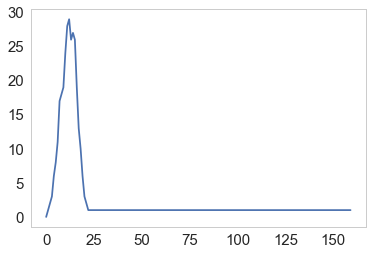

In [279]:
plt.plot(bee_data[0])
plt.show()

### Plot

In [307]:
def standardize_filenames(fname, start_char):
    fig_name = fname[:fname.index(start_char)-1]
    split_list = fig_name.split("_")
    # print(split_list)

    new_name = ""
    for i in range(len(split_list)):
        if len(split_list[i][1:]) > 5:
            if int(split_list[i][6]) <= 5:
                round_down = split_list[i][1:6]
                new_name += split_list[i][0] + round_down + "_"
                # print(round_down)
            else:
                round_up = str(float(split_list[i][1:6]) + 0.001)
                new_name += split_list[i][0] + round_up + "_"
                # print(round_up)

        else:
            new_name += split_list[i] + "_"

    # print(new_name)

    if new_name[-1] == "_":
        new_name = new_name[:-1]

    # print(new_name)

    return new_name

In [320]:
def plot_scenting(data_json):

    ''' For each replicate in a set of parameters, open that cumulative
    JSON and plot each replicate as a line in a single plot.
    '''

    data = get_avg_min_max(data_json)

    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes([0.1, 0.1, 0.6, 0.75])  # try

    # Standardize file names
    start_char = "j"
    fig_name = standardize_filenames(data_json, start_char)

    # Plotting
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # List of random ints from 0-20
    randoms = random.sample(range(0, 10), 5)
    
    # for i, d in enumerate(data):
    for r in range(len(randoms)):
        ax.plot(data[randoms[r]], label='Swarm {}'.format(r+1))

        plt.xlim(0, 160)
        plt.ylim(0, 40)

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        plt.xlabel('Time')
        plt.ylabel('Number of scenting bees')
        plt.title('{}'.format(fig_name))

        # plt.tight_layout()
        plt.savefig("figures/scenting_bees/{}.pdf".format(fig_name), transparent=True, bbox_inches='tight')




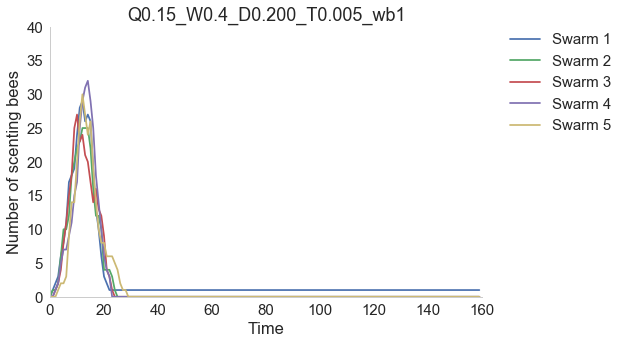

In [321]:
plot_scenting("Q0.15_W0.4_D0.2000000000_T0.005_wb1.json")